<a href="https://colab.research.google.com/github/giacomoaccursi/DataIntensiveExercise/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import os
from urllib.request import urlretrieve
def download(file, url): 
  if not os.path.isfile(file): 
    urlretrieve(url, file)

In [7]:
download("titanic_train.csv", "https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv")
download("titanic_test.csv", "https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/test.csv")

- pclass = classe del ticket
- sex = sesso della persona
- age = anno di età
- sibsp = compagni o sposi a bordo
- parch = parenti o figli a bordo
- ticket = codice del biglietto
- fare = tariffa del biglietto
- cabin = numero della cabina
- embarked = porto di imbarcazione (C = cherbourg, Q = queenstown, S = southampton. 

In [8]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

In [9]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Data Analysis

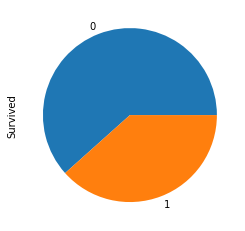

In [12]:
train["Survived"].value_counts().plot.pie(); 

In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
female = train[train["Sex"] == "female"]

In [16]:
male = train[train["Sex"] == "male"]

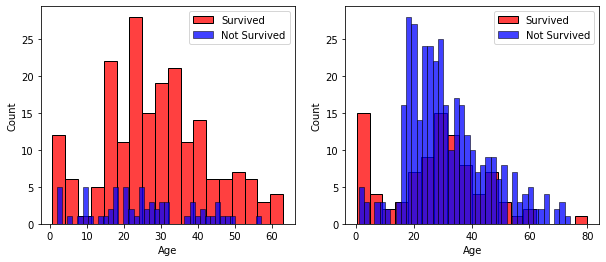

In [17]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4))
ax = sns.histplot(female[female["Survived"] == 1]["Age"].dropna(), bins = 18, label = "Survived", ax = axes[0], kde = False, color="red")
ax = sns.histplot(female[female["Survived"] == 0]["Age"].dropna(), bins = 40, label = "Not Survived", ax = axes[0], kde = False, color="blue")
ax.legend()

ax = sns.histplot(male[male["Survived"] == 1]["Age"].dropna(), bins = 18, label = "Survived", ax = axes[1], kde = False, color="red")
ax = sns.histplot(male[male["Survived"] == 0]["Age"].dropna(), bins = 40, label = "Not Survived", ax = axes[1], kde = False, color="blue")
ax.legend()


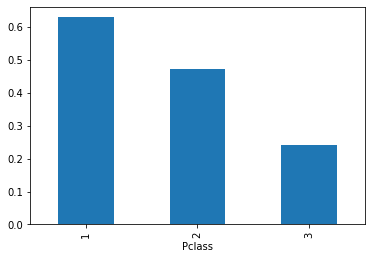

In [18]:

train.groupby("Pclass")["Survived"].mean().plot.bar();

Si nota come le persone della classe 1 abbiamo più chance di sopravvivere rispetto alle altre classi, soprattutto della terza.

In [19]:
train.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

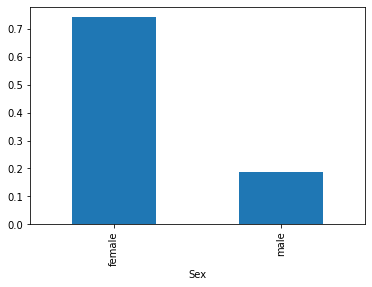

In [20]:
train.groupby("Sex")["Survived"].mean().plot.bar();

Le donne hanno una probabilità molto maggiore di salvarsi rispetto agli uomini

In [21]:
train["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
pd.qcut(train["Fare"], 4).value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: Fare, dtype: int64

# Data processing

Elimino passengerId poichè non influisce sulle probabilità di sopravvivenza

In [22]:
train.drop("PassengerId", axis=1, inplace=True)
test.drop("PassengerId", axis=1, inplace=True)


ci sono 177 campi Nan nell'età. li sostituisco con valori casuali fra mean-std e mean+std

In [23]:
for dataset in [train, test]: 
  mean = train["Age"].mean()
  std = train["Age"].std()
  isnull = dataset["Age"].isnull().sum()
  random_ages = np.random.randint(mean - std, mean + std, size=isnull)
  dataset["Age"][dataset["Age"].isnull()] = random_ages

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ci sono due valori mancanti nella colonna "Embarked". Li sostituisco con quello presente più volte

In [24]:
for dataset in [train, test]:
  dataset["Embarked"].fillna(dataset["Embarked"].describe()["top"], inplace=True)

elimino la colonna delle cabine per scarsità di dati disponibili

In [25]:
train.drop("Cabin", axis = 1, inplace = True)
test.drop("Cabin", axis = 1, inplace = True)

Guardando il dataset ci si accorge che abbiamo Fare che è float e 4 features categoriche: name, sex, ticket, e embarked. 

In [26]:
for dataset in [train, test]:
  dataset.fillna(0, inplace=True)
  dataset["Fare"] = dataset["Fare"].astype(int)

In [27]:
train["Fare"]

0       7
1      71
2       7
3      53
4       8
       ..
886    13
887    30
888    23
889    30
890     7
Name: Fare, Length: 891, dtype: int64

In [28]:

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in [train , test]:
  dataset["Title"] = dataset["Name"].str.extract("([A-Za-z]+)\.", expand = False)
  dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
  dataset["Title"] = dataset["Title"].map(titles)
  dataset["Title"].fillna(0, inplace=True)

In [29]:
train.drop("Name",axis=1, inplace = True)
test.drop("Name", axis = 1, inplace=True)

In [30]:
gender = {"male" : 0, "female" : 1}
for dataset in [train, test]:
  dataset["Sex"] = dataset["Sex"].map(gender)

In [31]:
train["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Ticket ha 681 valori differenti, conviene quindi eliminarlo

In [32]:
for dataset in [train, test]: 
  dataset.drop("Ticket", axis=1, inplace=True)

In [33]:
train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [34]:
ports = {
    port[1] : port[0] for port in enumerate(train["Embarked"].unique(), start = 1) 
}
ports

{'C': 2, 'Q': 3, 'S': 1}

In [35]:
for dataset in [train, test]: 
  dataset["Embarked"] = dataset["Embarked"].map(ports)

In [36]:
for dataset in [train, test]: 
  dataset["Age"] = dataset["Age"].astype(int)
  

In [37]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7,1,1
1,1,1,1,38,1,0,71,2,3
2,1,3,1,26,0,0,7,1,2
3,1,1,1,35,1,0,53,1,3
4,0,3,0,35,0,0,8,1,1


In [38]:

for dataset in [train, test]:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6



In [39]:
train['Age'].value_counts()

6    167
4    159
5    147
3    139
2    119
1     92
0     68
Name: Age, dtype: int64

In [40]:
for dataset in [train, test]:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [41]:
X_train = train.drop("Survived", axis = 1)
y_train = train["Survived"]
X_test = test

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_validate

In [43]:
kf = KFold(5, shuffle=True, random_state=42)

In [44]:
model = Pipeline([
             ("poly", PolynomialFeatures(degree=2, include_bias=False)),
             ("scaler", StandardScaler()), 
             ("logreg", LogisticRegression(solver = "saga", random_state = 42))
]) 

In [45]:
cv = cross_validate(model, X_train, y_train, cv = kf)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

In [46]:
cv.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

In [47]:
cv["test_score"].mean()

0.824938798568828

In [48]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [49]:
pred = pd.DataFrame(y_pred)
pred

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [50]:
pred = pred.set_index(np.arange(892, 1310))

In [51]:
pred.to_csv("/home/sub", index=['PassengerId', 'Survived'], header=True)

In [52]:
%pip install keras

In [53]:
import tensorflow as tf
import keras

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.regularizers import l2

model = Sequential([
                    Dense(256,  kernel_regularizer=l2(0.001), activation = "relu", input_dim = 8),
                    Dropout(0.1),
                    Dense(128, activation = "relu"),
                    Dense(64, activation = "relu"),
                    Dense(32, activation = "relu"),
                    Dense(16, activation = "relu"),
                    Dense(1, activation = "softmax")
])


In [55]:
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])

In [ ]:
fit_model = model.fit(X_train, y_train, batch_size=3, epochs = 100)

Epoch 1/100
297/297 [==============================] - 1s 2ms/step - loss: 0.6257 - accuracy: 0.3801
Epoch 2/100
297/297 [==============================] - 0s 2ms/step - loss: 0.6156 - accuracy: 0.3844
Epoch 3/100
297/297 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.3767
Epoch 4/100
297/297 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 0.3846
Epoch 5/100
297/297 [==============================] - 0s 2ms/step - loss: 0.5984 - accuracy: 0.4016
Epoch 6/100
297/297 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.4138
Epoch 7/100
297/297 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.3808
Epoch 8/100
297/297 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.3810
Epoch 9/100
297/297 [==============================] - 0s 2ms/step - loss: 0.6355 - accuracy: 0.3645
Epoch 10/100
297/297 [==============================] - 0s 2ms/step - loss: 0.6209 - accura